### Student Information
Name: Gregorius Ethanael Irawan

Student ID: T14705301

GitHub ID: ethanaeel

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## 1. The Data

In [1]:
# test code for environment setup and import necessary libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap



[nltk_data] Downloading package punkt to /Users/ethanael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Importing the Data
df = pd.read_csv("/Users/ethanael/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv")

df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


## 2. Data Preparation

In [3]:
# In this part, I will keep 5 columns for further analysis. 
# datetime and post_id as the key column
# Text and Sentiment column for the sentiment classification and subreddit for categorical visualization purposes.

df = df[["datetime","post_id","subreddit", "text", "sentiment"]]

#### I don't use the twenty_train format as the data is already in pandas dataframe format.

### **>>> Exercise 1**
In this exercise, please print out the *text* data for the first three samples in the dataset.

In [4]:
df['text'].iloc[:3] # printing out 'text' for the first three.

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
Name: text, dtype: object

## 3. Data Transformation

#### I skipped part 3.1 because the data is already in Pandas Dataframe format

### 3.2 Familiarizing yourself with the Data

In [5]:
# a simple query
df[:10][["text","subreddit"]] #query of the first 10 records of columns text and subreddit

,text,subreddit
0,Calls on retards,wallstreetbets
1,Stunt as in like why did they even make a big ...,wallstreetbets
2,Seeing lots of red in the ticker.,StockMarket
3,Vision Marine Technologies Inc. is rewriting t...,stockstobuytoday
4,He didn’t say thank you.,StockMarket
5,"Hoping to ejaculate in wet warm puss tonight, ...",wallstreetbets
6,Trump will respond to china increasing their t...,stocks
7,Confirmed not a trap. Its been like this for p...,wallstreetbets
8,Am I the only one seeing the cup & handle brea...,stocks
9,HLGN is $10. Hurry and catch it now before it ...,stockstobuytoday


In [6]:
# querying the last 10 records
df[-10:]

,datetime,post_id,subreddit,text,sentiment
837,2021-02-01 17:13:52,glmdsae,stocks,Finance media lying \n\n*Surprise*,0.0
838,2021-04-26 20:17:28,gvyyjqb,stockstobuytoday,I am all in,0.0
839,2025-04-11 16:02:56,mml0hpk,StockMarket,The Art of the Deal…,0.0
840,2025-04-11 9:32:08,mmjac41,StockMarket,Lol fr,1.0
841,2025-04-11 16:09:15,mml1qqd,StockMarket,So countries “begging to stop the tariffs” and...,0.0
842,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,Invest now it is going to shoot up tomorrow,0.0
843,2025-04-11 5:01:24,mmijiuz,StockMarket,Where can I read this?,0.0
844,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0
845,2025-04-11 20:13:26,mmmely7,wallstreetbets,i sold my puts so i expect cheeto to declare w...,0.0
846,2025-04-12 3:09:06,mmobyz1,wallstreetbets,![img](emote|t5_2th52|31224),0.0


In [7]:
# using loc (by label)
df.loc[:10,'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [8]:
# using iloc (by position)
df.iloc[:10,3]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

### **>>> Exercise 2:** 
Experiment with other querying techniques using pandas dataframes.

In [9]:
df.loc[:5,'subreddit'] # querying the first 5 data of a specified column

0      wallstreetbets
1      wallstreetbets
2         StockMarket
3    stockstobuytoday
4         StockMarket
5      wallstreetbets
Name: subreddit, dtype: object

In [10]:
df.iloc[:5,4] # querying the first 5 data of the 4th column

0   -1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: sentiment, dtype: float64

In [11]:
df.loc[:10, ["text", "subreddit"]] # querying the first 10 data of text and subreddit column

,text,subreddit
0,Calls on retards,wallstreetbets
1,Stunt as in like why did they even make a big ...,wallstreetbets
2,Seeing lots of red in the ticker.,StockMarket
3,Vision Marine Technologies Inc. is rewriting t...,stockstobuytoday
4,He didn’t say thank you.,StockMarket
5,"Hoping to ejaculate in wet warm puss tonight, ...",wallstreetbets
6,Trump will respond to china increasing their t...,stocks
7,Confirmed not a trap. Its been like this for p...,wallstreetbets
8,Am I the only one seeing the cup & handle brea...,stocks
9,HLGN is $10. Hurry and catch it now before it ...,stockstobuytoday


In [12]:
df[df["subreddit"] == "stocks"] # querying with conditional where subreddit = stocks

,datetime,post_id,subreddit,text,sentiment
6,2025-04-11 12:37:23,mmjx7vz,stocks,Trump will respond to china increasing their t...,-1.0
8,2021-02-01 15:36:32,gllyi5z,stocks,Am I the only one seeing the cup & handle brea...,1.0
10,2025-04-11 15:19:19,mmkri9d,stocks,It's a copy/paste from a Bloomberg terminal.,0.0
12,2025-04-11 5:55:28,mmipka9,stocks,"Honestly let the economy burn, maybe people wi...",1.0
13,2025-03-04 23:49:37,mg20s26,stocks,"\nI’ve been doing pretty good with this, but i...",1.0
...,...,...,...,...,...
831,2025-04-11 15:00:14,mmknn5s,stocks,Things will get better soon. Once those 9 tran...,1.0
833,2025-04-10 19:53:17,mmg0rfb,stocks,LVMH (MC)-31.42%\n\nDisney (DIS)-17.03% \n\nAp...,0.0
834,2025-04-11 11:05:48,mmjkdim,stocks,There's going to be 4 years of this shit. How ...,-1.0
835,2021-02-01 13:56:01,glljm0r,stocks,I was also disappointed to see it mentioned in...,-1.0


In [13]:
df.query("sentiment == 1") # querying with conditional where the sentiment is positive

,datetime,post_id,subreddit,text,sentiment
1,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Stunt as in like why did they even make a big ...,1.0
3,2023-08-30 17:12:55,165kllm,stockstobuytoday,Vision Marine Technologies Inc. is rewriting t...,1.0
5,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,"Hoping to ejaculate in wet warm puss tonight, ...",1.0
7,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Confirmed not a trap. Its been like this for p...,1.0
8,2021-02-01 15:36:32,gllyi5z,stocks,Am I the only one seeing the cup & handle brea...,1.0
...,...,...,...,...,...
827,2025-04-11 14:42:51,mmkk45p,StockMarket,"Exciting, I guess that’s one way to characteri...",1.0
831,2025-04-11 15:00:14,mmknn5s,stocks,Things will get better soon. Once those 9 tran...,1.0
832,2023-12-07 14:52:08,kcdd0nh,stockstobuytoday,NICE. Cannot complain.,1.0
836,2025-03-26 12:18:30,1jkadvn,stockstobuytoday,"how does the futures market look today\n\nSPY,...",1.0


In [14]:
df.filter(items=["sentiment"], axis=1) # select the column sentiment

,sentiment
0,-1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
842,0.0
843,0.0
844,0.0
845,0.0


### **>>> Exercise 3:**  
Try to fetch records belonging to the ```StockMarket``` category, and query every 10th record. Only show the first 5 records.

In [15]:
df[df["subreddit"] == "StockMarket"][::10][:5]

,datetime,post_id,subreddit,text,sentiment
2,2025-04-10 15:09:41,mmeevio,StockMarket,Seeing lots of red in the ticker.,0.0
62,2025-04-11 16:11:48,mml28yw,StockMarket,Comedy gold :)),1.0
94,2025-04-11 15:15:20,mmkqpao,StockMarket,I can’t take four years of lying. Help!,0.0
113,2025-04-11 10:04:54,mmjdl3n,StockMarket,\nAn evil man will burn his own nation to the ...,-1.0
146,2025-04-11 14:46:24,mmkku1z,StockMarket,He reached this level only because of his inhe...,1.0


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [16]:
# check missing values
df.isnull()

,datetime,post_id,subreddit,text,sentiment
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
842,False,False,False,False,False
843,False,False,False,False,False
844,False,False,False,False,False
845,False,False,False,False,False


In [17]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,datetime,post_id,subreddit,text,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


We can see that there are no missing values

### >>> **Exercise 4:** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  

In [18]:
df.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

I will skip the insert dummy missing value as the implementation is similar to the master.

### >>> **Exercise 5:** 

Exercise was done in the master.

### 4.2 Dealing with Duplicate Data

In [19]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

In [20]:
sum(df.duplicated())

0

No duplicates were found.

In [21]:
# In this part, I will keep 3 columns for further analysis. Text and Sentiment column for the sentiment classification and subreddit for categorical visualization purposes.
# datetime and post_id is no longer needed. I tried dropping them from the start and found out that duplicate datas will be detected. However, from the datetime and post_id, it can be seen that those datas are actually unique.

df = df[["subreddit", "text", "sentiment"]]

## 5. Data Preprocessing

### 5.1 Sampling

In [22]:
# As the number of data is 847, I will set a sample of 200.

df_sample = df.sample(n=200)

In [23]:
len(df_sample)

200

In [24]:
df_sample[0:4]

,subreddit,text,sentiment
516,StockMarket,Go with the flow if you wanna make money..for ...,-1.0
142,stocks,Imagine having the dollar backed by Trump coin...,-1.0
245,StockMarket,Let him take it all and much more. I want his ...,-1.0
800,stocks,"It's a pretty unremarkable product, but you wo...",1.0


### >>> Exercise 6:
Notice any changes from the `df` dataframe to the `df_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `df`. Feel free to query and look more closely at the dataframe for these changes.

It will select 200 random samples from the 847 population. 

The first noticeable part is that the rows are not sequential. In df dataframe, we can see it starting from 0 and increases by 1. In df_sample, we start from 635 and has no rule for the next rows as it is randomized.

In [25]:
import matplotlib.pyplot as plt

In [26]:
# Checking unique value for subreddit

categories = df["subreddit"].unique()

categories



array(['wallstreetbets', 'StockMarket', 'stockstobuytoday', 'stocks'],
      dtype=object)

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

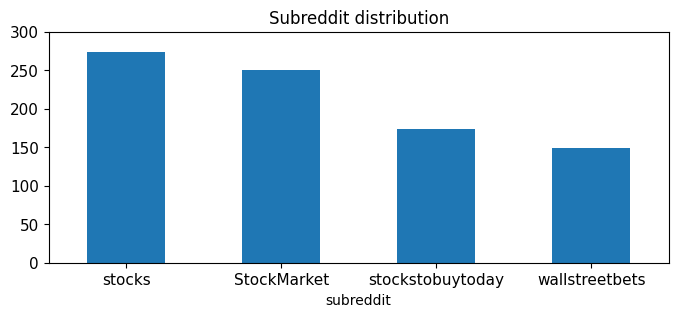

In [27]:
print(df.subreddit.value_counts())

# plot barchart for df
df.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Subreddit distribution',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

subreddit
stocks              69
StockMarket         65
wallstreetbets      33
stockstobuytoday    33
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit distribuion'}, xlabel='subreddit'>

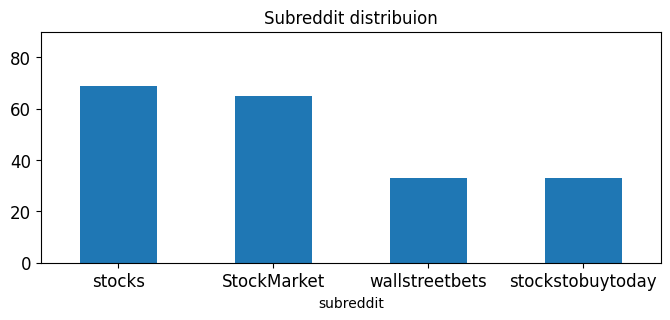

In [28]:
print(df_sample.subreddit.value_counts())

# plot barchart for df_sample
df_sample.subreddit.value_counts().plot(kind = 'bar',
                                           title = 'Subreddit distribuion',
                                           ylim = [0, 90], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 7:**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

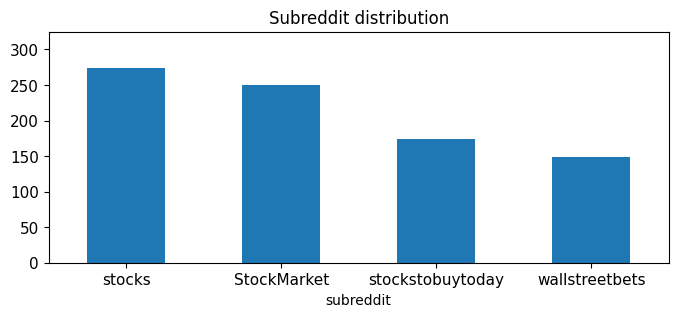

In [29]:
# plot barchart for df and hard-coding the limit
df.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Subreddit distribution',
                                    ylim = [0, df.subreddit.value_counts().max()+51],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

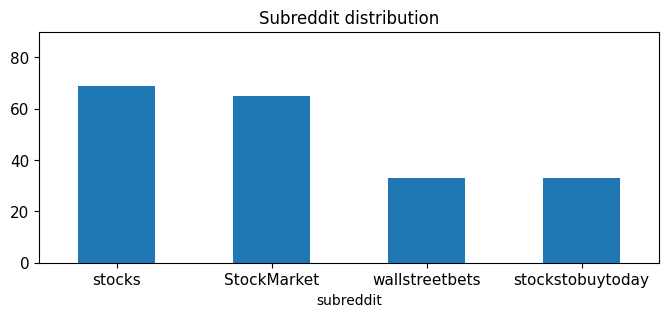

In [30]:
# plot barchart for df_sample and hard-coding the limit
df_sample.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Subreddit distribution',
                                    ylim = [0, df_sample.subreddit.value_counts().max()+21],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 8:** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

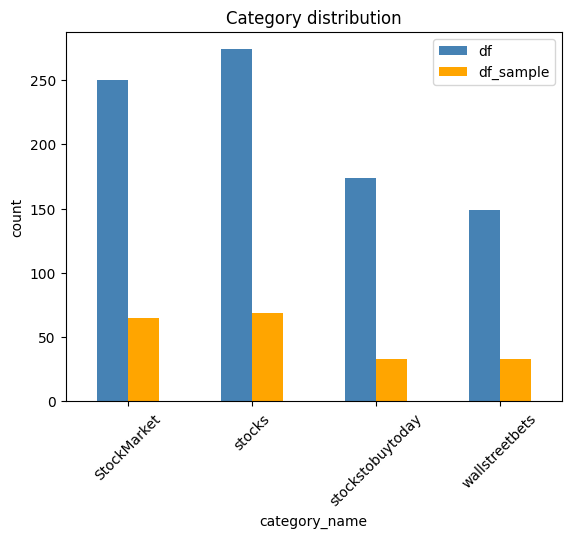

In [31]:
counts1 = df.subreddit.value_counts()        
counts2 = df_sample.subreddit.value_counts()

data = pd.DataFrame({'df': counts1, 'df_sample': counts2}).fillna(0)
data.plot(kind='bar', 
        title='Category distribution',
        color=['steelblue', 'orange'])
plt.ylabel('count')
plt.xlabel('category_name')
plt.xticks(rotation=45)
plt.show()


### 5.2 Feature Creation

In [32]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/ethanael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ethanael/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [33]:
# takes a like a minute or two to process

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [34]:
df[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [35]:
df[0:4]

,subreddit,text,sentiment,unigrams
0,wallstreetbets,Calls on retards,-1.0,"[Calls, on, retards]"
1,wallstreetbets,Stunt as in like why did they even make a big ...,1.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,StockMarket,Seeing lots of red in the ticker.,0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,stockstobuytoday,Vision Marine Technologies Inc. is rewriting t...,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [36]:
list(df[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature subset selection

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [38]:
# examples
count_vect.get_feature_names_out()[343]

'answer'

In [39]:
count_vect.get_feature_names_out()[22]

'125'

In [40]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a taiwanese beef noodle")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'taiwanese', 'beef', 'noodle']

### **>>> Exercise 9:**
Let's analyze the first record of our df dataframe with the new analyzer we have just built.

In [41]:
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(df.text[0])

['calls', 'on', 'retards']

In [42]:
# Check matrix shape
df_counts.shape

(847, 4346)

In [43]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [44]:
# Convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10:**
Notice that there is a 3 in the fourth record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [45]:
count_vect.get_feature_names_out()[18]

'116'

In [46]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [47]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [48]:
plot_z = df_counts[0:20, 0:20].toarray() #df_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

Next, I will create a heatmap using seaborn

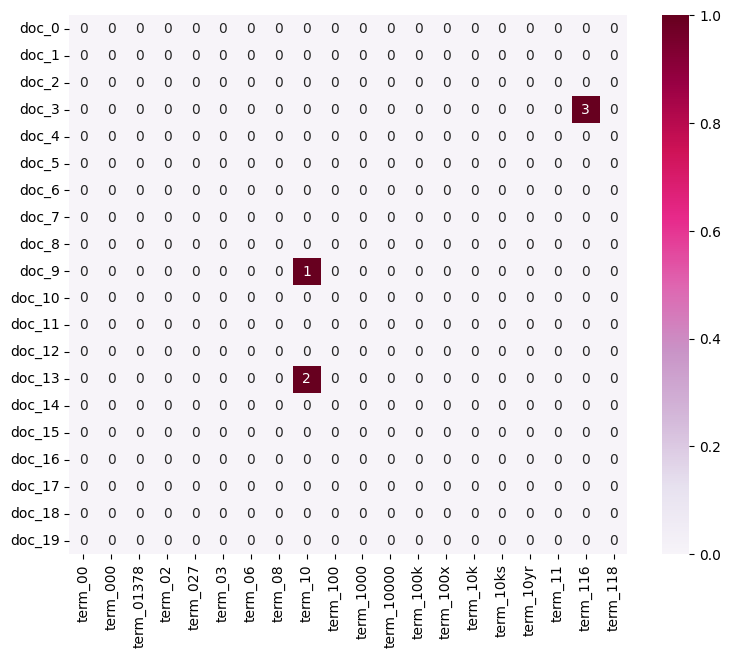

In [49]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11:** 
From the chart above, we can see how sparse the term-document matrix is. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [50]:
# Answer here

# Case 1: Select 20-100 features only (bigger than before)

plot_a = ["term_"+str(i) for i in count_vect.get_feature_names_out()[20:100]]

# obtain document index
plot_b = ["doc_"+ str(i) for i in list(df.index)[20:100]]

plot_c = df_counts[20:100, 20:100].toarray() #df_counts[how many documents, how many terms]
plot_c

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

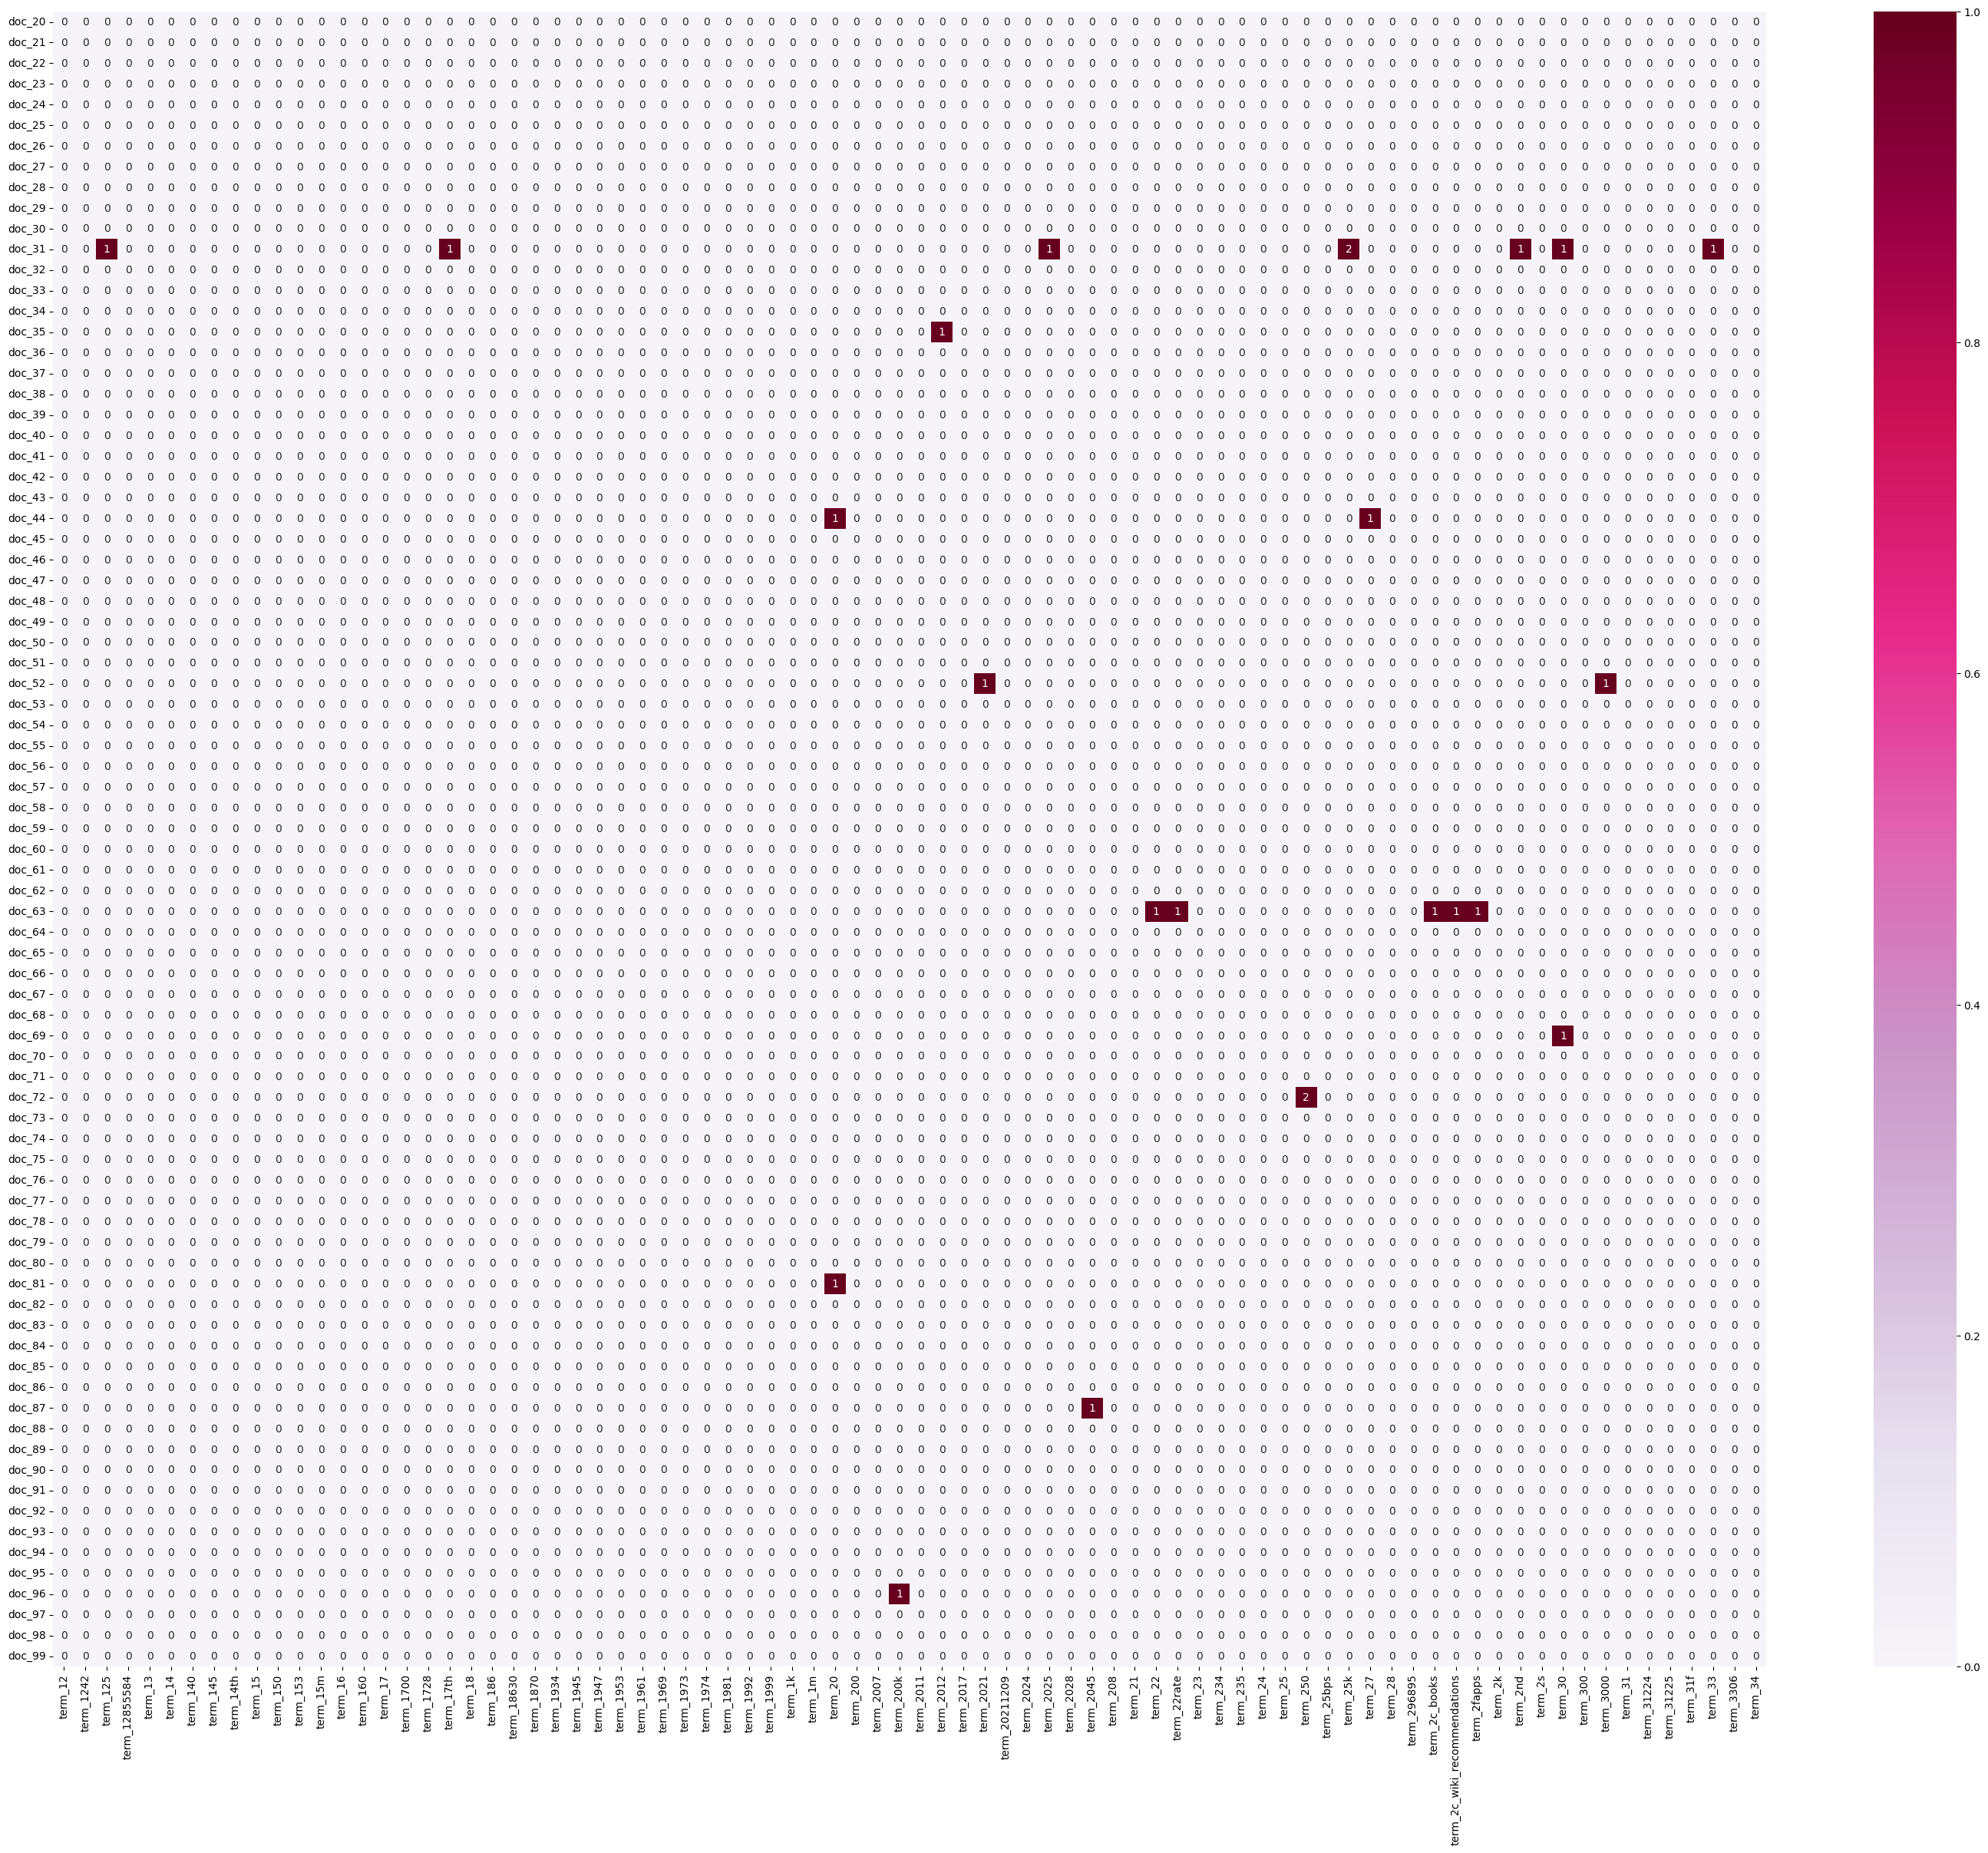

In [51]:
df_todraw = pd.DataFrame(plot_c, columns = plot_a, index = plot_b)
plt.subplots(figsize=(36, 28))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

This might be bigger but it is still sparse.

In [52]:
# Case 2: Making a Document-Term matrix to then visualize the 50 most used terms in the first 100 documents.

df_texts = df["unigrams"].astype(str)

vectorizer = CountVectorizer()
df_dtm = vectorizer.fit_transform(df_texts)

# Convert it to DataFrame
df_dtm = pd.DataFrame(df_dtm.toarray(), columns=vectorizer.get_feature_names_out())

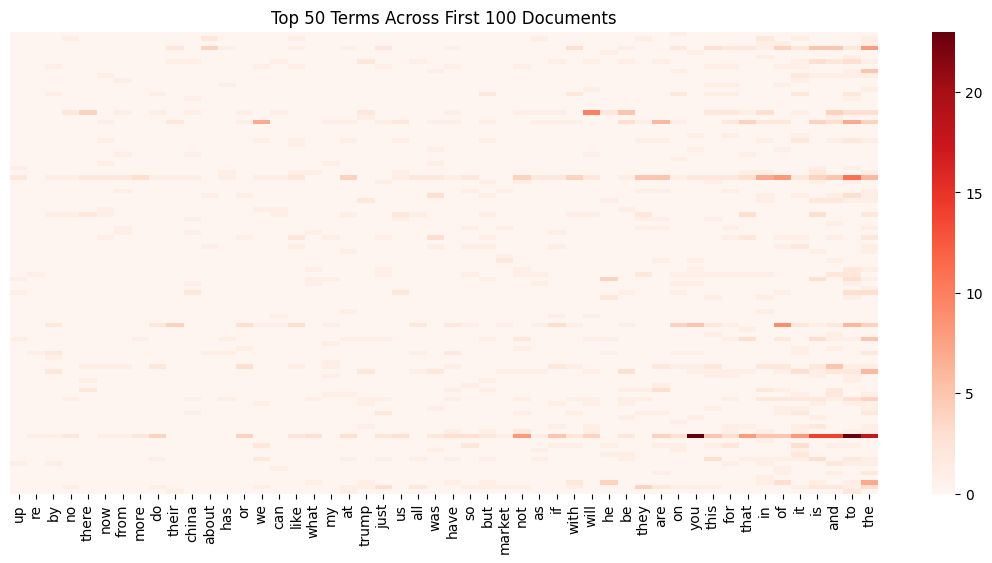

In [53]:
term_sums = df_dtm.sum(axis=0).to_numpy()
top_indices = np.argsort(term_sums)[-50:]
submatrix = df_dtm.iloc[:100, top_indices].to_numpy()

# Plot with labels
top_terms = df_dtm.columns[top_indices]

plt.figure(figsize=(14, 6))
sns.heatmap(submatrix, cmap="Reds", xticklabels=top_terms, yticklabels=False)
plt.xticks(rotation=90)
plt.title("Top 50 Terms Across First 100 Documents")
plt.show()

Now, we can see that the visualization is easier to interpret. By selecting the top 50 most used terms rather than just picking random terms, we can get better insights. This example is used for the first 100 doecuments and can be easily adjusted to any subset of the document.

### 5.4 Attribute Transformation / Aggregation

### 5.4.1 Transform Text Data

In [54]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [55]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [56]:
term_frequencies[0] #sum of first term

np.int64(4)

/var/folders/b8/mvd11sjs16qgkl75_18vdqm40000gn/T/ipykernel_8344/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


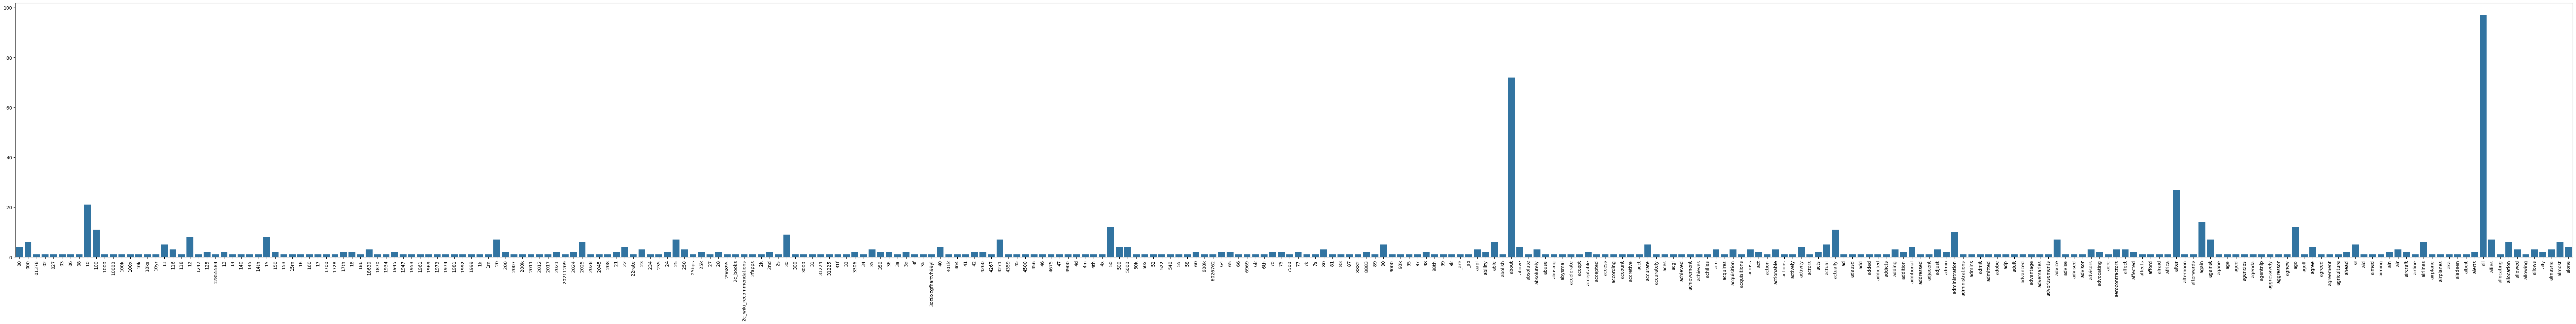

In [57]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12:**
Using Plotly for interactive visualization

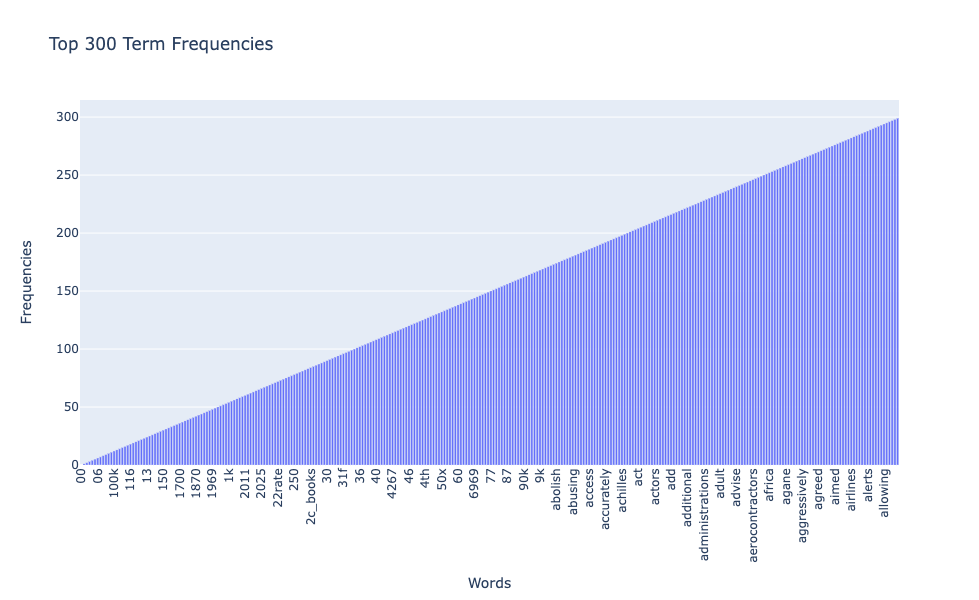

In [58]:
import plotly.express as px

words = count_vect.get_feature_names_out()[:300]
freqs = term_frequencies[:300]

fig = px.bar(
    x=words,
    y=freqs,
    labels={'x': 'Words', 'y': 'Frequencies'},
    title="Top 300 Term Frequencies"
)

fig.update_layout(
    xaxis_tickangle=-90,
    width=3000,  
    height=600
)

fig.show()

### >>> **Exercise 13:** 
Efficiently reduce the number of terms

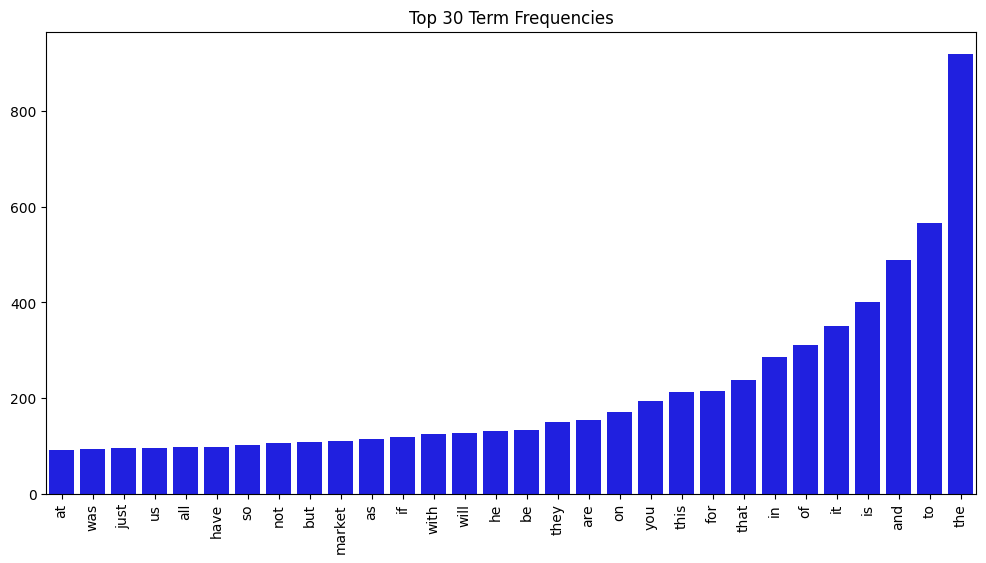

In [59]:
# Answer here

# Case 1: select top-n most frequent terms

top_n = 30
indices = np.argsort(term_frequencies)[-top_n:]  
words = count_vect.get_feature_names_out()[indices]
freqs = term_frequencies[indices]

plt.figure(figsize=(12, 6))
sns.barplot(x=words, y=freqs, color="blue")
plt.xticks(rotation=90)
plt.title(f"Top {top_n} Term Frequencies")
plt.show()

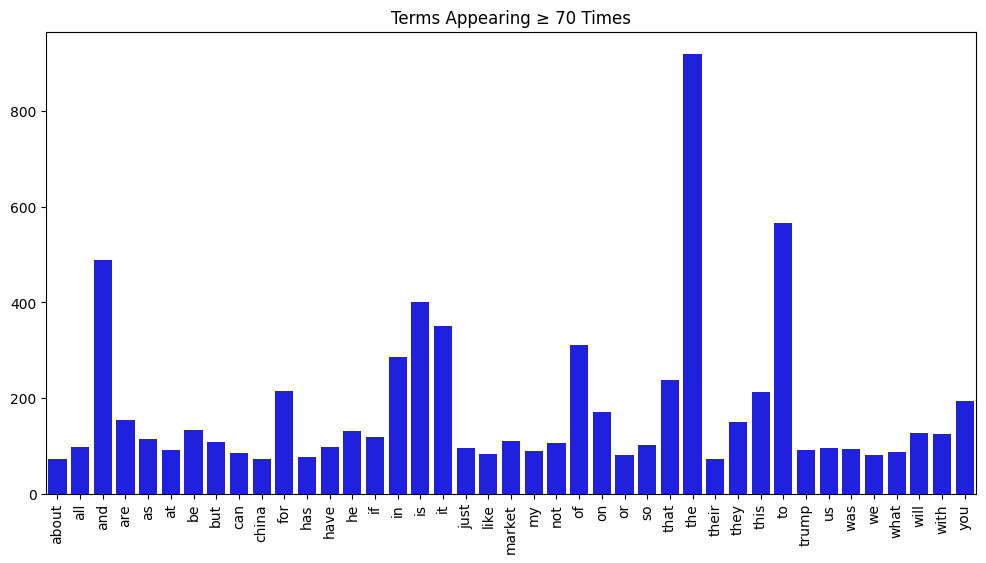

In [60]:
# Case 2: Set minimum n to show

min_freq = 70
mask = term_frequencies >= min_freq
words = count_vect.get_feature_names_out()[mask]
freqs = term_frequencies[mask]

plt.figure(figsize=(12, 6))
sns.barplot(x=words, y=freqs, color="blue")
plt.xticks(rotation=90)
plt.title(f"Terms Appearing ≥ {min_freq} Times")
plt.show()

### >>> **Exercise 14 :** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order.

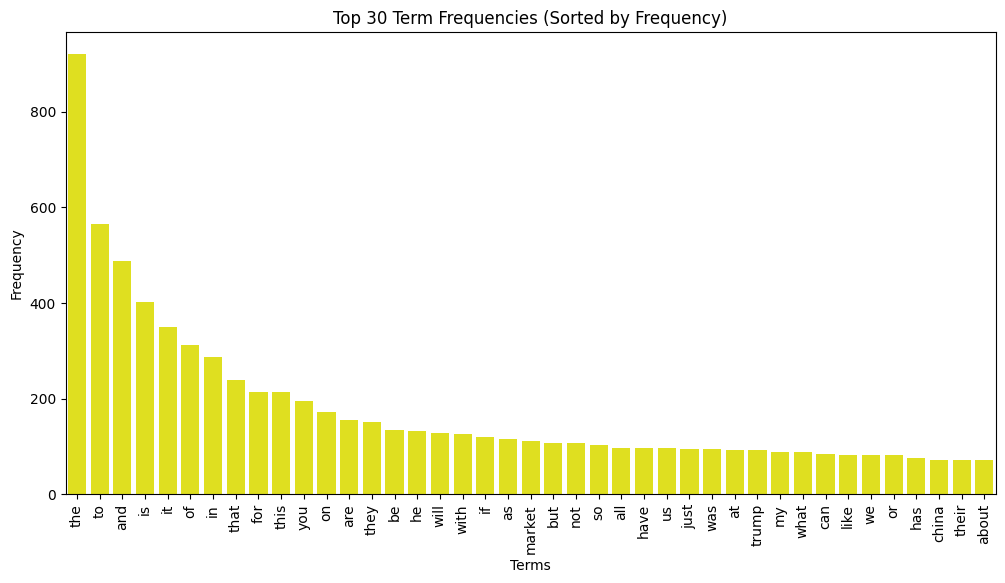

In [61]:
sorted_idx = np.argsort(freqs)[::-1]
words = words[sorted_idx]
freqs = freqs[sorted_idx]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=words, y=freqs, color="yellow")
plt.xticks(rotation=90)
plt.title(f"Top {top_n} Term Frequencies (Sorted by Frequency)")
plt.ylabel("Frequency")
plt.xlabel("Terms")
plt.show()

In [62]:
# Using log distribution
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/b8/mvd11sjs16qgkl75_18vdqm40000gn/T/ipykernel_8344/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



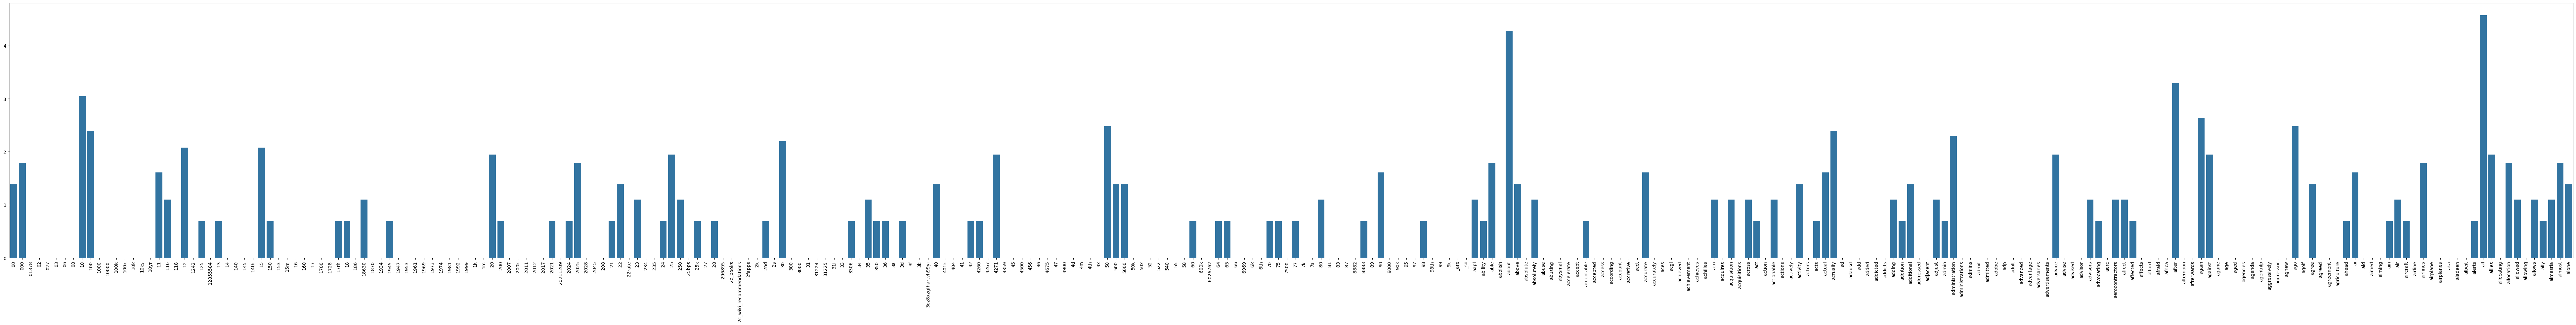

In [63]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 
Implementing the code to the log frequency

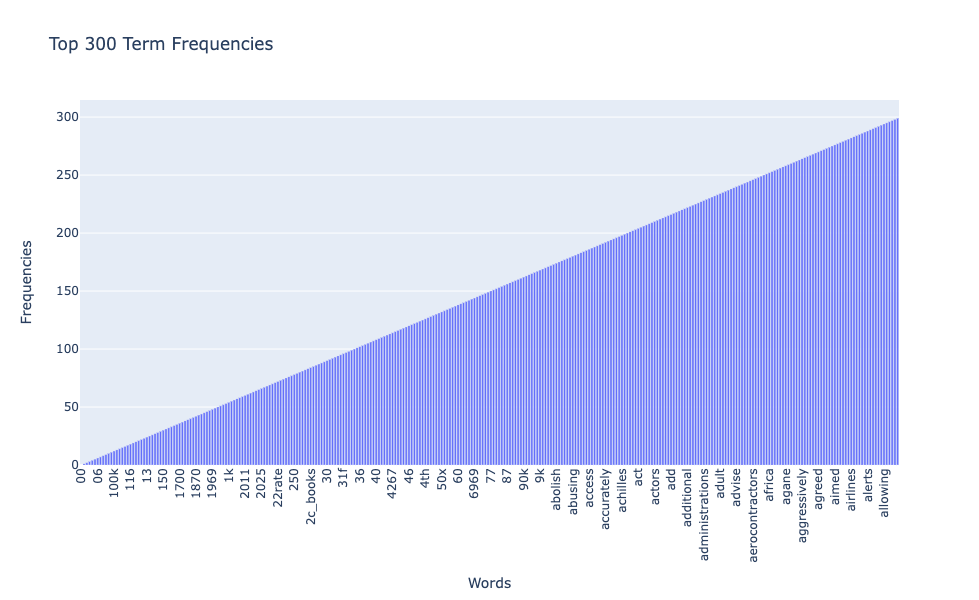

In [64]:
# Answer here

words = count_vect.get_feature_names_out()[:300]
freqs = term_frequencies_log[:300]

fig = px.bar(
    x=words,
    y=freqs,
    labels={'x': 'Words', 'y': 'Frequencies'},
    title="Top 300 Term Frequencies"
)

fig.update_layout(
    xaxis_tickangle=-90,
    width=3000,  
    height=600
)

fig.show()

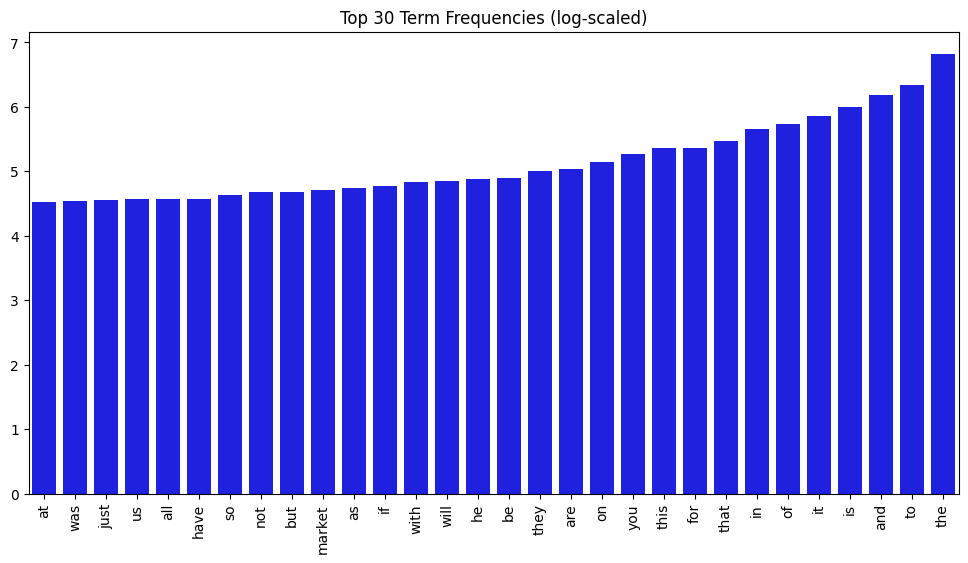

In [65]:
top_n = 30

term_frequencies_log = np.array(term_frequencies_log)

indices_log = np.argsort(term_frequencies_log)[-top_n:]
words_log = count_vect.get_feature_names_out()[indices]
freqs_log = term_frequencies_log[indices]

plt.figure(figsize=(12, 6))
sns.barplot(x=words_log, y=freqs_log, color="blue")
plt.xticks(rotation=90)
plt.title(f"Top {top_n} Term Frequencies (log-scaled)")
plt.show()

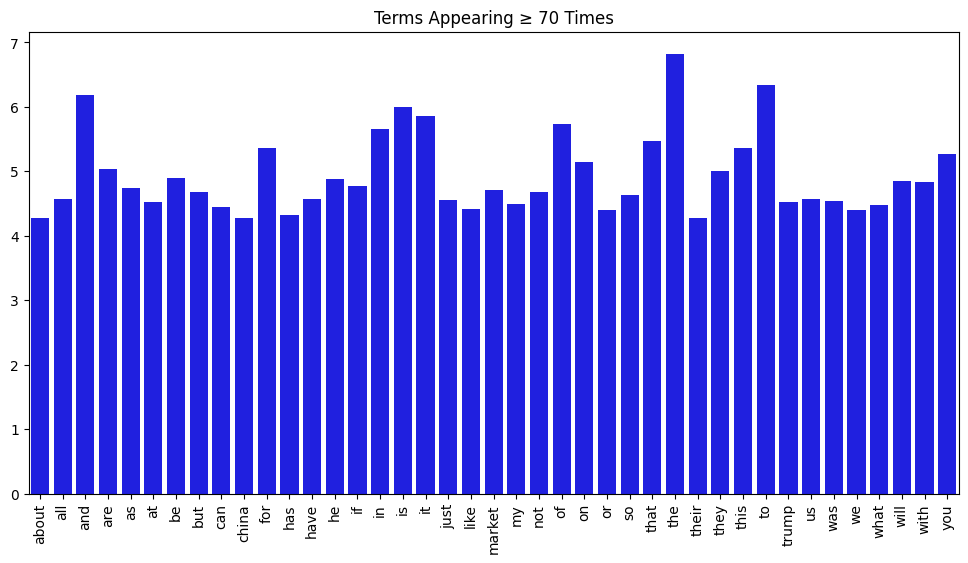

In [66]:
min_freq = 70
mask_log = term_frequencies >= min_freq
words_log = count_vect.get_feature_names_out()[mask_log]
freqs_log = term_frequencies_log[mask_log]

plt.figure(figsize=(12, 6))
sns.barplot(x=words_log, y=freqs_log, color="blue")
plt.xticks(rotation=90)
plt.title(f"Terms Appearing ≥ {min_freq} Times")
plt.show()


# Phase 2

### 5.4.2 Finding frequent patterns

In [67]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['subreddit'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['subreddit'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [68]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category StockMarket:


,027,10,100,100x,12,1945,1947,1953,1961,1969,...,yeah,year,years,yes,yet,yo,you,your,yourselves,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


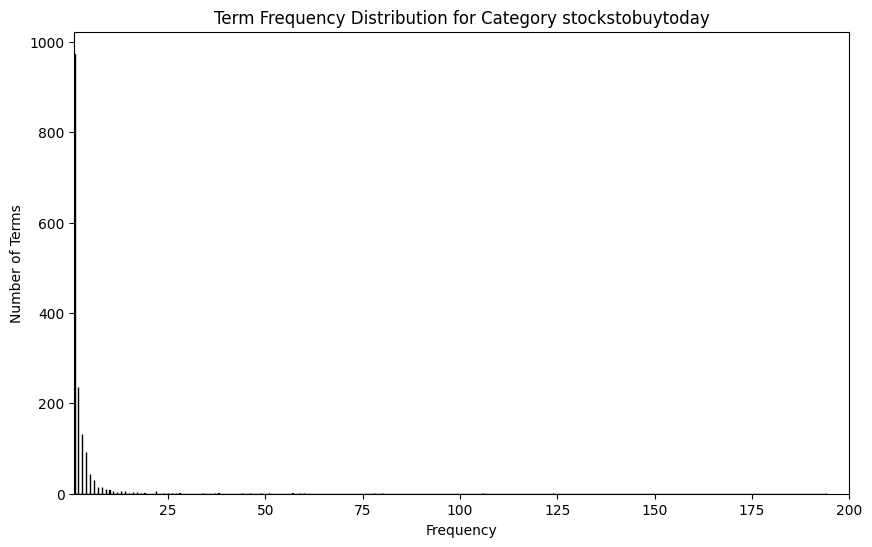

In [69]:
 # Sum over all documents to get total frequency for each word
category_number=2 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [70]:
category_number=3 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: stocks
Number of terms in top 5%: 117
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'you', 'that', 'on', 'this', 'for', 'will', 'are', 'be', 'if', 'as', 'us', 'with', 'but', 'he', 'all', 'trump', 'at', 'not', 'have', 'they', 'what', 'or', 'was', 'so', 'we', 'people', 'like', 'market', 'has', 'my', 'from', 'there', 'more', 'now', 'your', 'no', 'think', 'china', 'by', 'silver', 'just', 'their', 'can', 'how', 'even', 'do', 'money', 'than', 're', 'an', 'other', 'why', 'one', 'about', 'would', 'going', 'tariffs', 'them', 'some', 'any', 'our', 'most', 'don', 'who', 'when', 'economy', 'see', 'down', 'his', 'then', 'me', 'because', 'world', 'been', 'up', 'want', 'back', 'time', 'term', 'companies', 'already', 'good', 'doing', 'last', 'really', 'portfolio', 'sell', 'only', 'much', 'which', '10', 'years', 'over', 'could', 'out', 'too', 'day', 'trade', 'every', 'into', 'wants', 'go', 'buy', 'does', 'here', 'him', 'point', 'company', 'get', 'bad']


### >>>Exercise 16 (take home):

In [71]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category wallstreetbets we filter the following words:
Bottom 1.0% words: 
zero             1
intern           1
international    1
store            1
investing        1
investment       1
ip               1
ipo              1
iq               1
dtype: int64
Top 5.0% words: 
she          8
market       8
with         8
still        8
when         8
go           8
if           8
what         9
up           9
good         9
puts         9
about        9
there        9
no           9
target      10
we          10
be          10
will        10
now         10
not         10
over        11
all         11
was         11
have        12
are         12
at          14
but         15
just        15
can         15
like        16
so          17
emote       18
img         18
t5_2th52    18
on          20
my          21
that        21
of          23
this        24
they        25
for         26
you         28
is          29
in          29
and         37
it          43
the         57
to          60

,10,100,1000,10k,12,17th,186,18630,1934,1981,...,wsb,wutang,xi,year,years,yesterday,yet,yippee,your,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Bottom 1%:
consist mostly of rare, technical, and specific terms that appear only once or twice. 

Top 5%:
mostly are very common words such as conjunctions and connectors

The similarities between the groups is that the high frequency words are related to the category. For example:
1. wallstreetbets: market, go, puts
2. StockMarket: mistakes, miscalculated, minus
3. stockstobuytoday: how, get, analysis
4. stocks: bad, get, company

In [72]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 146
Number of items : 915
Minimum Transaction Size : 1
Average Transaction Size : 9.308219178082192
Maximum Transaction Size : 62
Standard Deviation Transaction Size : 9.376131945174984
Variance in Transaction Sizes : 88.51813887576759
Sparsity : 0.9898270828654839


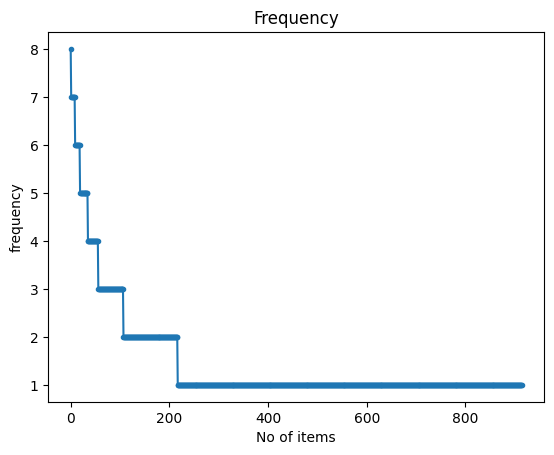

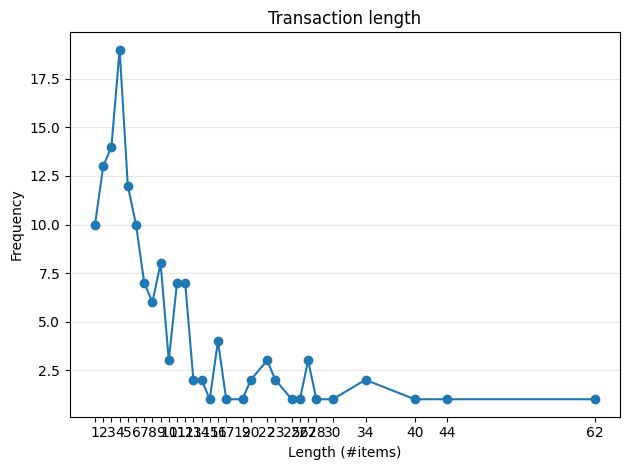

In [73]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_wallstreetbets.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 248
Number of items : 1499
Minimum Transaction Size : 1
Average Transaction Size : 10.153225806451612
Maximum Transaction Size : 145
Standard Deviation Transaction Size : 12.30692458821371
Variance in Transaction Sizes : 152.07359279091028
Sparsity : 0.993226667240526


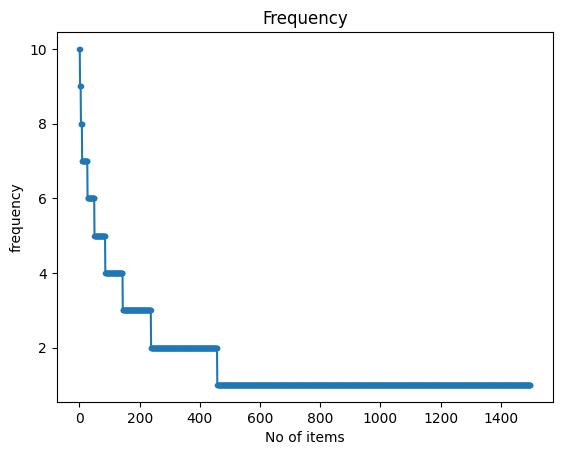

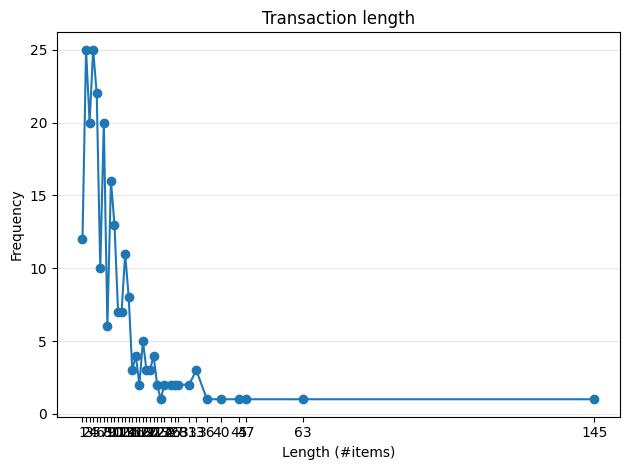

In [74]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_StockMarket.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 172
Number of items : 1522
Minimum Transaction Size : 1
Average Transaction Size : 14.046511627906977
Maximum Transaction Size : 219
Standard Deviation Transaction Size : 25.67570880647662
Variance in Transaction Sizes : 663.0972392220863
Sparsity : 0.9907710173272621


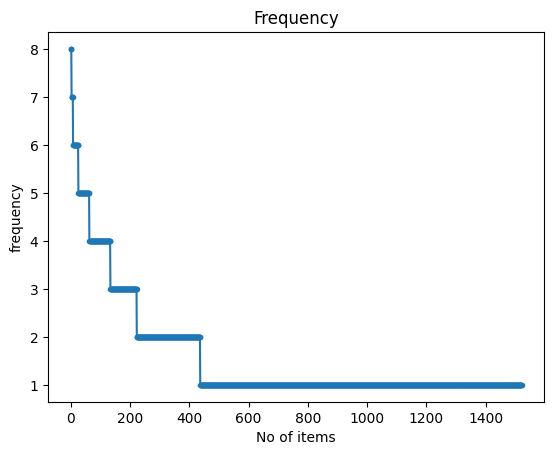

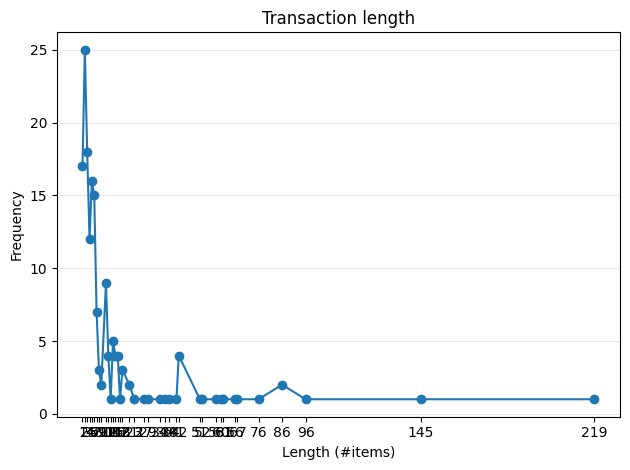

In [75]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_stockstobuytoday.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 274
Number of items : 2206
Minimum Transaction Size : 1
Average Transaction Size : 14.284671532846716
Maximum Transaction Size : 165
Standard Deviation Transaction Size : 17.008134123176575
Variance in Transaction Sizes : 290.3362476939119
Sparsity : 0.993524627591638


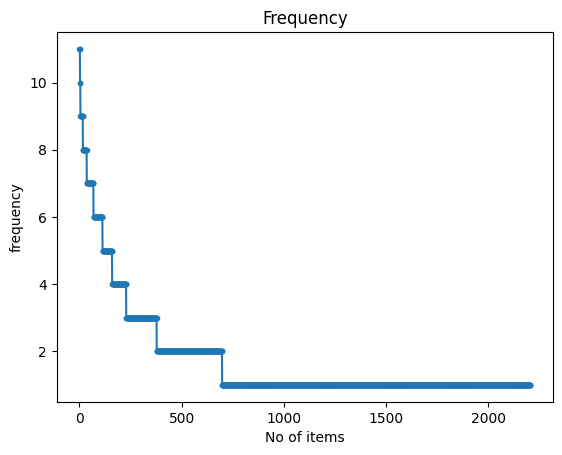

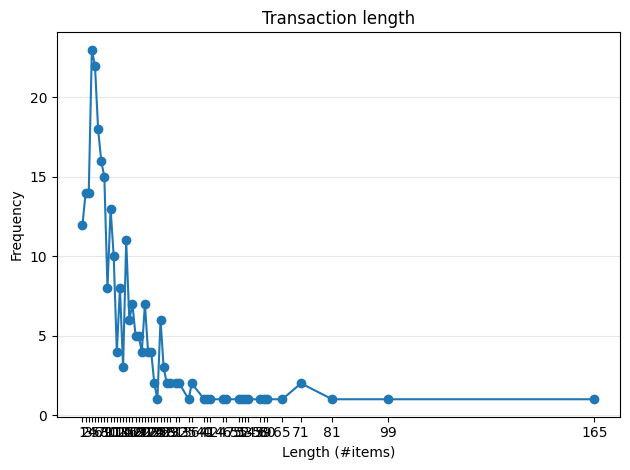

In [76]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_stocks.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [77]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_wallstreetbets.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_wallstreetbets= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_wallstreetbets))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.0007560253143310547


In [78]:
obj1.save('freq_patterns_wallstreetbets_minSup9.txt') #save the patterns
frequentPatternsDF_wallstreetbets

,Patterns,Support


We see that there are no patterns identified in the wallstreetbets category

In [79]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_StockMarket.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_StockMarket= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_StockMarket))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 5
Runtime: 0.0013556480407714844


In [80]:
obj1.save('freq_patterns_StockMarket_minSup9.txt') #save the patterns
frequentPatternsDF_StockMarket

,Patterns,Support
0,from,9
1,want,9
2,than,9
3,get,10
4,there,10


In [81]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_stockstobuytoday.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_stockstobuytoday= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.0019459724426269531


No number of patterns were found.

In [82]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_stocks.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_stocks= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stocks))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 17
Runtime: 0.001811981201171875


In [83]:
obj1.save('freq_patterns_stocks_minSup9.txt') #save the patterns
frequentPatternsDF_stocks

,Patterns,Support
0,looking,9
1,ve,9
2,right,9
3,buying,9
4,seems,9
5,still,9
6,country,9
7,reason,9
8,make,9
9,way,9


In [97]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_wallstreetbets, frequentPatternsDF_StockMarket, frequentPatternsDF_stockstobuytoday, frequentPatternsDF_stocks]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

   Patterns Support
21    since      11
20     also      11
19   things      11
3       get      10
4     there      10
18     know      10
17     shit      10
12   reason       9
16   reddit       9
15   better       9
14      way       9
13     make       9
0      from       9
1      want       9
10    still       9
9     seems       9
8    buying       9
7     right       9
6        ve       9
5   looking       9
2      than       9
11  country       9
Number of patterns discarded: 0


In [84]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)

No patters are discarded, which means that there are no patterns that are common across those categories. Therefore, data augmentation is not needed.

I skipped exercise 17.

### 5.5 Dimensionality Reduction

In [85]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

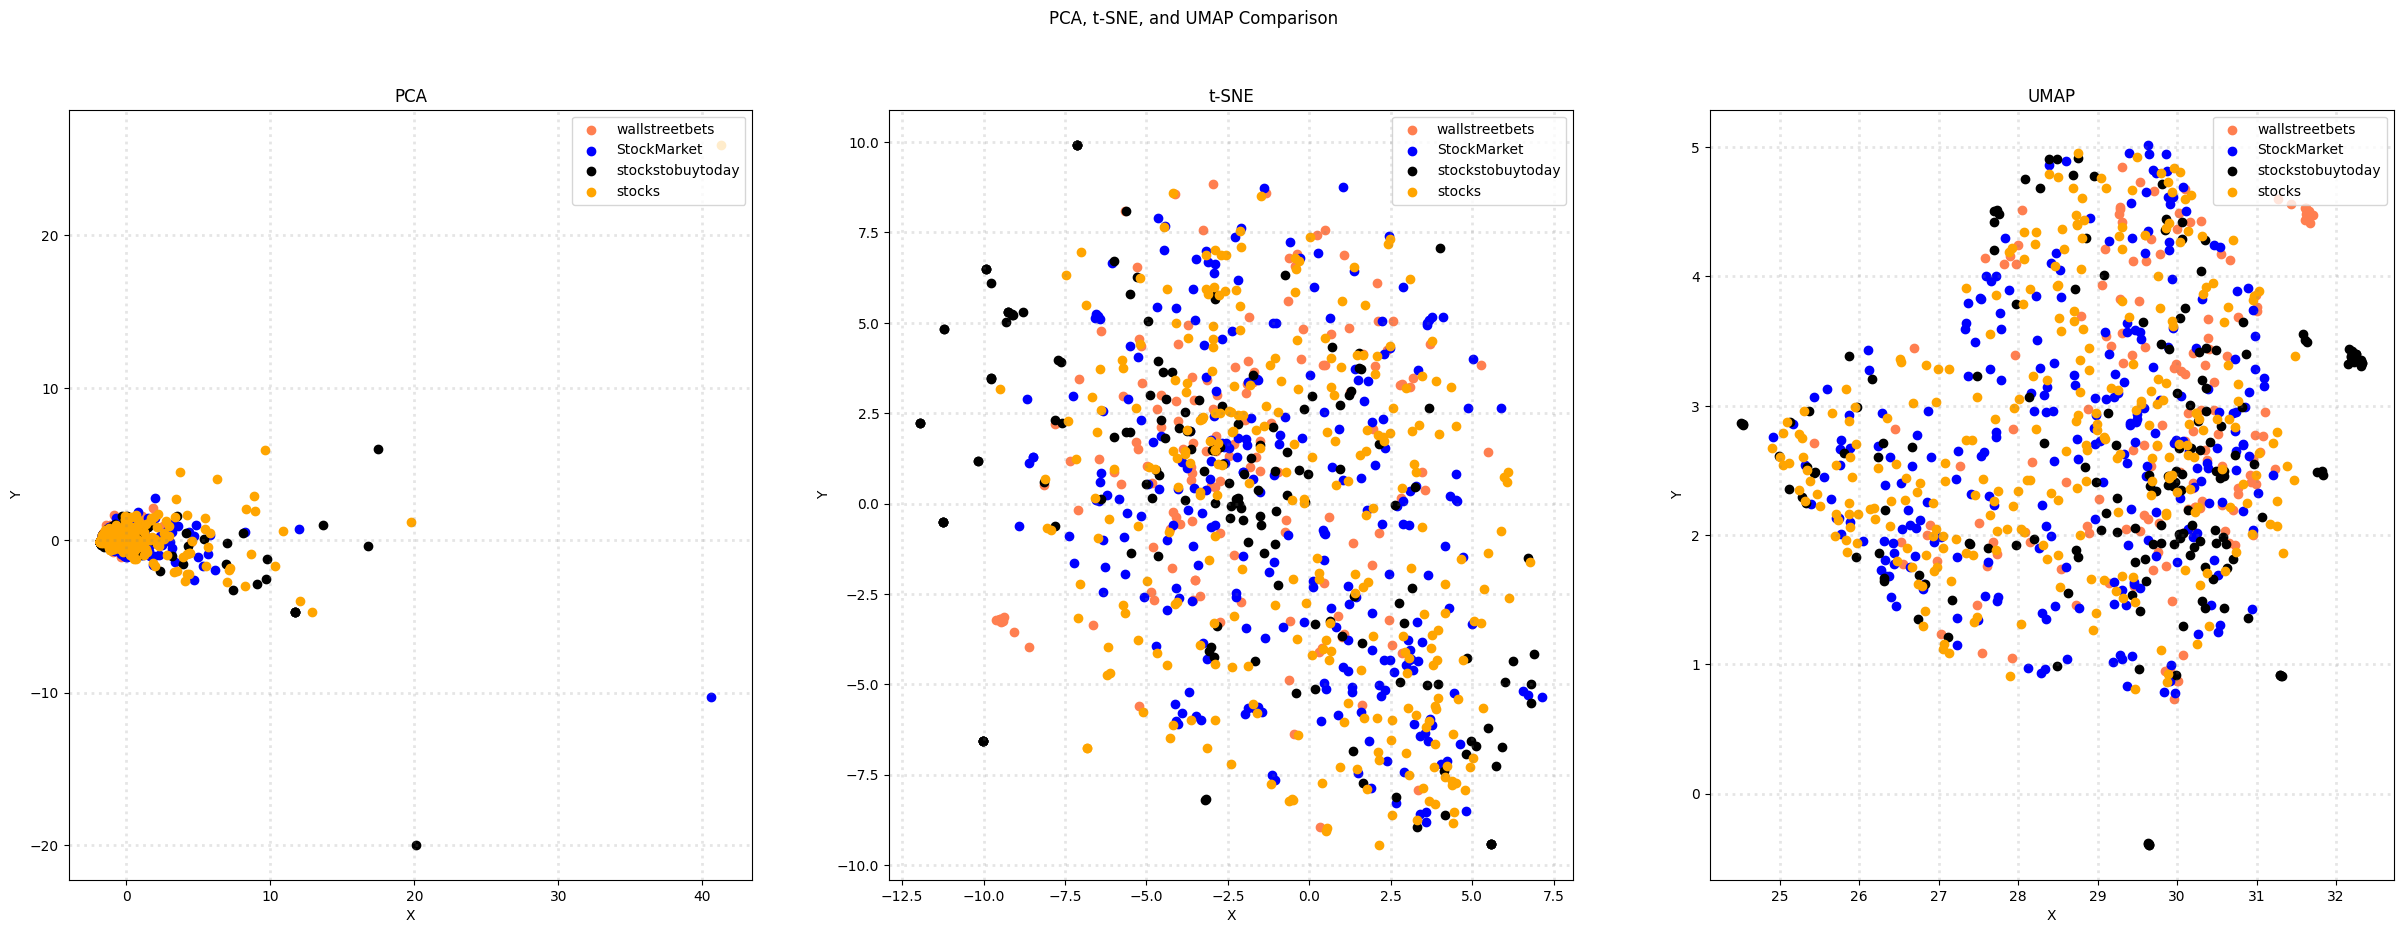

In [87]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['subreddit'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['subreddit'] == category].T[0]
        ys = X_reduced[df['subreddit'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result

In [89]:
X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(tdm_df.values)

/Users/ethanael/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



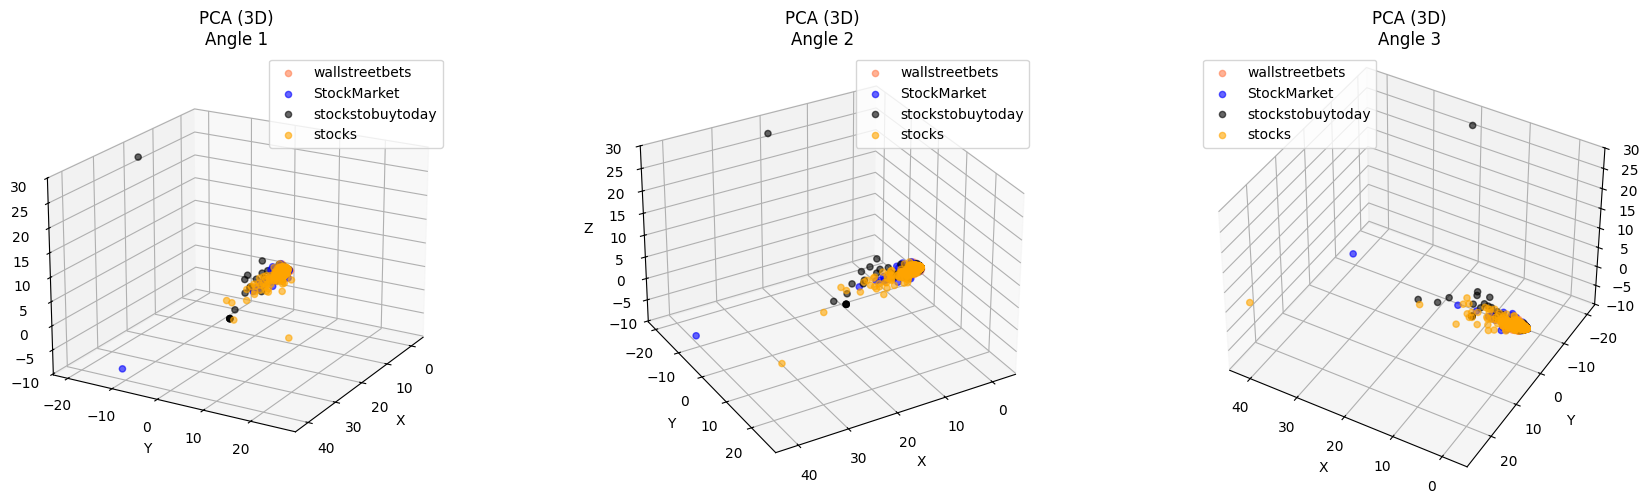

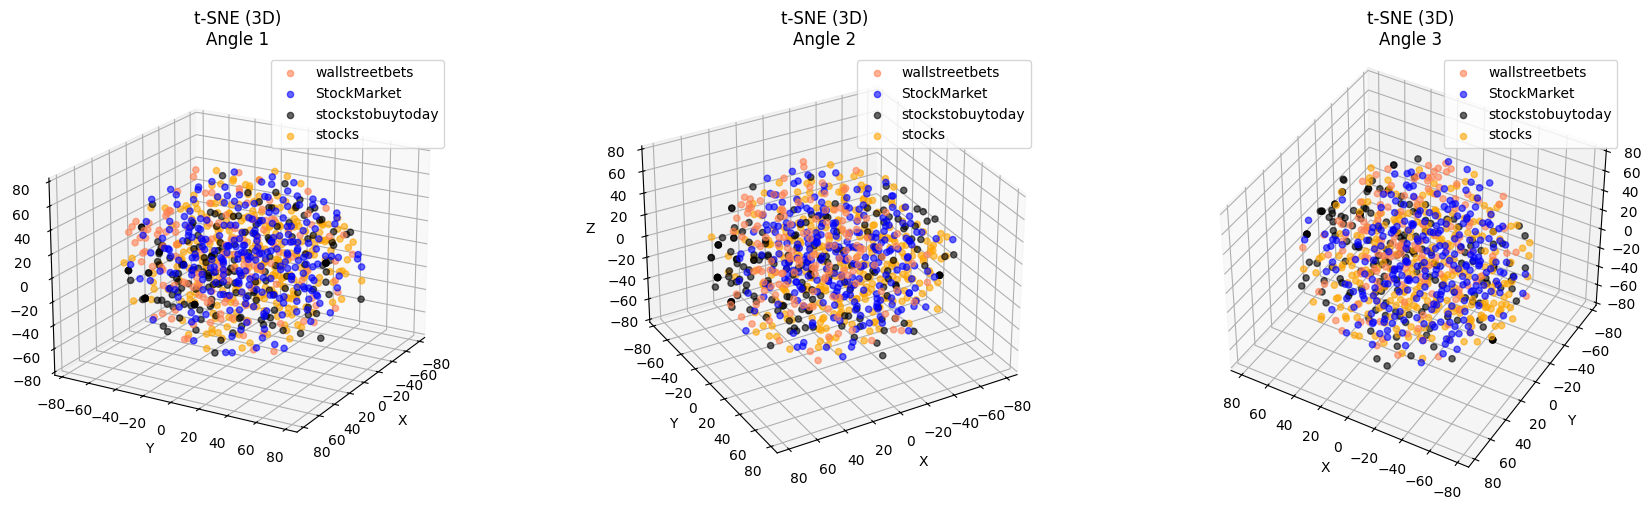

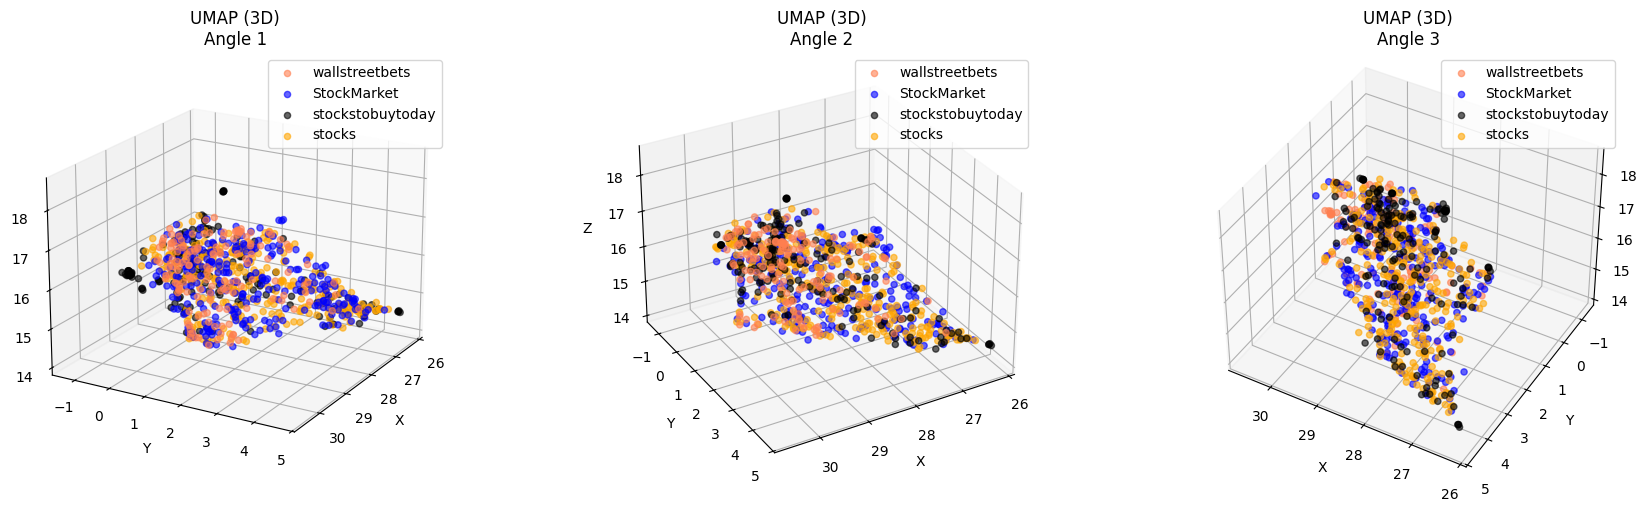

In [91]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']
categories = df['subreddit'].unique()

# Function to plot 3D scatter
def plot_3d(ax, X_3d, title):
    for c, category in zip(col, categories):
        subset = df[df['subreddit'] == category]
        idx = subset.index
        ax.scatter(
            X_3d[idx, 0], X_3d[idx, 1], X_3d[idx, 2],
            c=c, label=category, alpha=0.6
        )
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

# Define different angles
angles = [(20, 30), (30, 60), (40, 120)]  # (elev, azim)

# Loop through each method and angle
methods = {
    'PCA (3D)': X_pca_3d,
    't-SNE (3D)': X_tsne_3d,
    'UMAP (3D)': X_umap_3d
}

for method_name, X_3d in methods.items():
    fig = plt.figure(figsize=(18, 5))
    for i, (elev, azim) in enumerate(angles, 1):
        ax = fig.add_subplot(1, 3, i, projection='3d')
        plot_3d(ax, X_3d, f'{method_name}\nAngle {i}')
        ax.view_init(elev=elev, azim=azim)
    plt.tight_layout()
    plt.show()


From the plots, PCA shows some separation but the clusters overlap a lot, suggesting it captures general trends but not fine details. t-SNE forms clearer, tighter clusters where categories group together better, showing strong local relationships. UMAP also shows clear grouping but in a slightly different shape, preserving both local and global structures. Overall, t-SNE and UMAP give better visual separation between classes than PCA.

### 5.6 Discretization and Binarization

In [92]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [93]:
mlb = preprocessing.LabelBinarizer()

In [97]:
mlb.fit(df.subreddit)

LabelBinarizer()

In [98]:
df['bin_category'] = mlb.transform(df['subreddit']).tolist()

In [99]:
df[0:9]

,subreddit,text,sentiment,unigrams,bin_category
0,wallstreetbets,Calls on retards,-1.0,"[Calls, on, retards]","[0, 0, 0, 1]"
1,wallstreetbets,Stunt as in like why did they even make a big ...,1.0,"[Stunt, as, in, like, why, did, they, even, ma...","[0, 0, 0, 1]"
2,StockMarket,Seeing lots of red in the ticker.,0.0,"[Seeing, lots, of, red, in, the, ticker, .]","[1, 0, 0, 0]"
3,stockstobuytoday,Vision Marine Technologies Inc. is rewriting t...,1.0,"[Vision, Marine, Technologies, Inc., is, rewri...","[0, 0, 1, 0]"
4,StockMarket,He didn’t say thank you.,0.0,"[He, didn, ’, t, say, thank, you, .]","[1, 0, 0, 0]"
5,wallstreetbets,"Hoping to ejaculate in wet warm puss tonight, ...",1.0,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","[0, 0, 0, 1]"
6,stocks,Trump will respond to china increasing their t...,-1.0,"[Trump, will, respond, to, china, increasing, ...","[0, 1, 0, 0]"
7,wallstreetbets,Confirmed not a trap. Its been like this for p...,1.0,"[Confirmed, not, a, trap, ., Its, been, like, ...","[0, 0, 0, 1]"
8,stocks,Am I the only one seeing the cup & handle brea...,1.0,"[Am, I, the, only, one, seeing, the, cup, &, h...","[0, 1, 0, 0]"


I will skip exercise 19. Answered in the Master

# 6. Data Exploration

### >>> **Exercise 20:**

In [100]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [101]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']
['Everyone is talking about the Bond market. But the rates for the bond market are still lower than the rates they had earlier this year.\n\nWhat is everyone talking about?']


In [102]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [104]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.109109
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.142857
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/b8/mvd11sjs16qgkl75_18vdqm40000gn/T/ipykernel_8344/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/b8/mvd11sjs16qgkl75_18vdqm40000gn/T/ipykernel_8344/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/b8/mvd11sjs16qgkl75_18vdqm40000gn/T/ipykernel_8344/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/b8/mvd11sjs16qgkl75_18vdqm40000gn/T/ipykernel_8344/452772485.py:17: Depreca

There are almost no similarities between the documents. The value of cosine similarity is very low.

# 7. Data Classification


### Naive Bayes Classifier

In [107]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['subreddit'], test_size=0.3, random_state=42)

In [110]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.5529411764705883

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5570    0.6111    0.5828        72
          stocks     0.4885    0.7356    0.5872        87
stockstobuytoday     0.7826    0.3673    0.5000        49
  wallstreetbets     0.6818    0.3191    0.4348        47

        accuracy                         0.5529       255
       macro avg     0.6275    0.5083    0.5262       255
    weighted avg     0.6000    0.5529    0.5411       255



We dont have the augmented data because there are no overlapping pattern between subreddits.

### Decision Tree Classifier

In [111]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt,digits=4))

Decision Tree Accuracy (TDM): 0.4392156862745098

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.4156    0.4444    0.4295        72
          stocks     0.4930    0.4023    0.4430        87
stockstobuytoday     0.5581    0.4898    0.5217        49
  wallstreetbets     0.3281    0.4468    0.3784        47

        accuracy                         0.4392       255
       macro avg     0.4487    0.4458    0.4432       255
    weighted avg     0.4533    0.4392    0.4424       255



### >>> **Exercise 23 (take home):**

Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.

The Decision Tree classifier achieved lower accuracy and F1-scores compared to Naive Bayes because Decision Trees do not perform well with high dimensional and sparse text data. On the other hand, Naive Bayes effectively models word frequency distributions and assumes feature independence, making it more robust for text classification tasks. The Decision Tree also tends to overfit small subsets of data after many splits, leading to reduced generalization performance.

# Experimenting with other Machine Learning

## Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = rf_classifier.predict(X_test)
print("Random Forest Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt,digits=4))


Random Forest Accuracy (TDM): 0.4823529411764706

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.4286    0.5417    0.4785        72
          stocks     0.5526    0.4828    0.5153        87
stockstobuytoday     0.7600    0.3878    0.5135        49
  wallstreetbets     0.3651    0.4894    0.4182        47

        accuracy                         0.4824       255
       macro avg     0.5266    0.4754    0.4814       255
    weighted avg     0.5229    0.4824    0.4867       255



## Kernel Support Vector Machine

In [117]:
from sklearn.svm import SVC
ksvm_classifier = SVC(kernel = 'rbf', random_state = 42)
ksvm_classifier.fit(X_train, y_train)


# Predict and evaluate
y_pred_dt = ksvm_classifier.predict(X_test)
print("Kernel SVM Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt,digits=4))

Kernel SVM Accuracy (TDM): 0.45098039215686275

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.3742    0.8472    0.5191        72
          stocks     0.5493    0.4483    0.4937        87
stockstobuytoday     0.6842    0.2653    0.3824        49
  wallstreetbets     1.0000    0.0426    0.0816        47

        accuracy                         0.4510       255
       macro avg     0.6519    0.4008    0.3692       255
    weighted avg     0.6089    0.4510    0.4035       255



We can see that all models are having a hard time in classifying accurately.

In my opinion, this happen because there are no distinct pattern in each category, so it's hard to differentiate them.